<br><font color='darkviolet' size=8><u>K-Means Clustering From Scratch</u></font>

In [1]:
# importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from collections import defaultdict
warnings.filterwarnings('ignore')

In [2]:
# creating the dataframe using sklearn make_blobs dataset
data=make_blobs(n_samples=10000,n_features=3,centers=5)

# note the above data is a tuple of array

# the first array is a 3d feature array which we're capturing in the following dataframe
print(data[0])
print('\n')

# the next array is an array of labels which we'll use later to compare our clusters with the actuals
print(data[1])

df=pd.DataFrame(data[0],columns=['x','y','z'])
df

[[ 5.82765956  7.32423514  7.77681253]
 [ 7.22482476  2.39916155  1.19303728]
 [ 7.85311355  7.25548031  7.6658914 ]
 ...
 [ 9.26614152  3.35689039  2.37858604]
 [-3.82255188  1.41362671 -2.55401136]
 [ 1.39164993 -8.45473918 -3.879649  ]]


[0 1 0 ... 1 2 3]


,x,y,z
0,5.827660,7.324235,7.776813
1,7.224825,2.399162,1.193037
2,7.853114,7.255480,7.665891
3,-2.796820,0.839631,-1.269645
4,1.383403,-9.459319,-5.026871
...,...,...,...
9995,3.757361,-2.481639,0.019540
9996,2.532154,-1.032398,1.226494
9997,9.266142,3.356890,2.378586
9998,-3.822552,1.413627,-2.554011


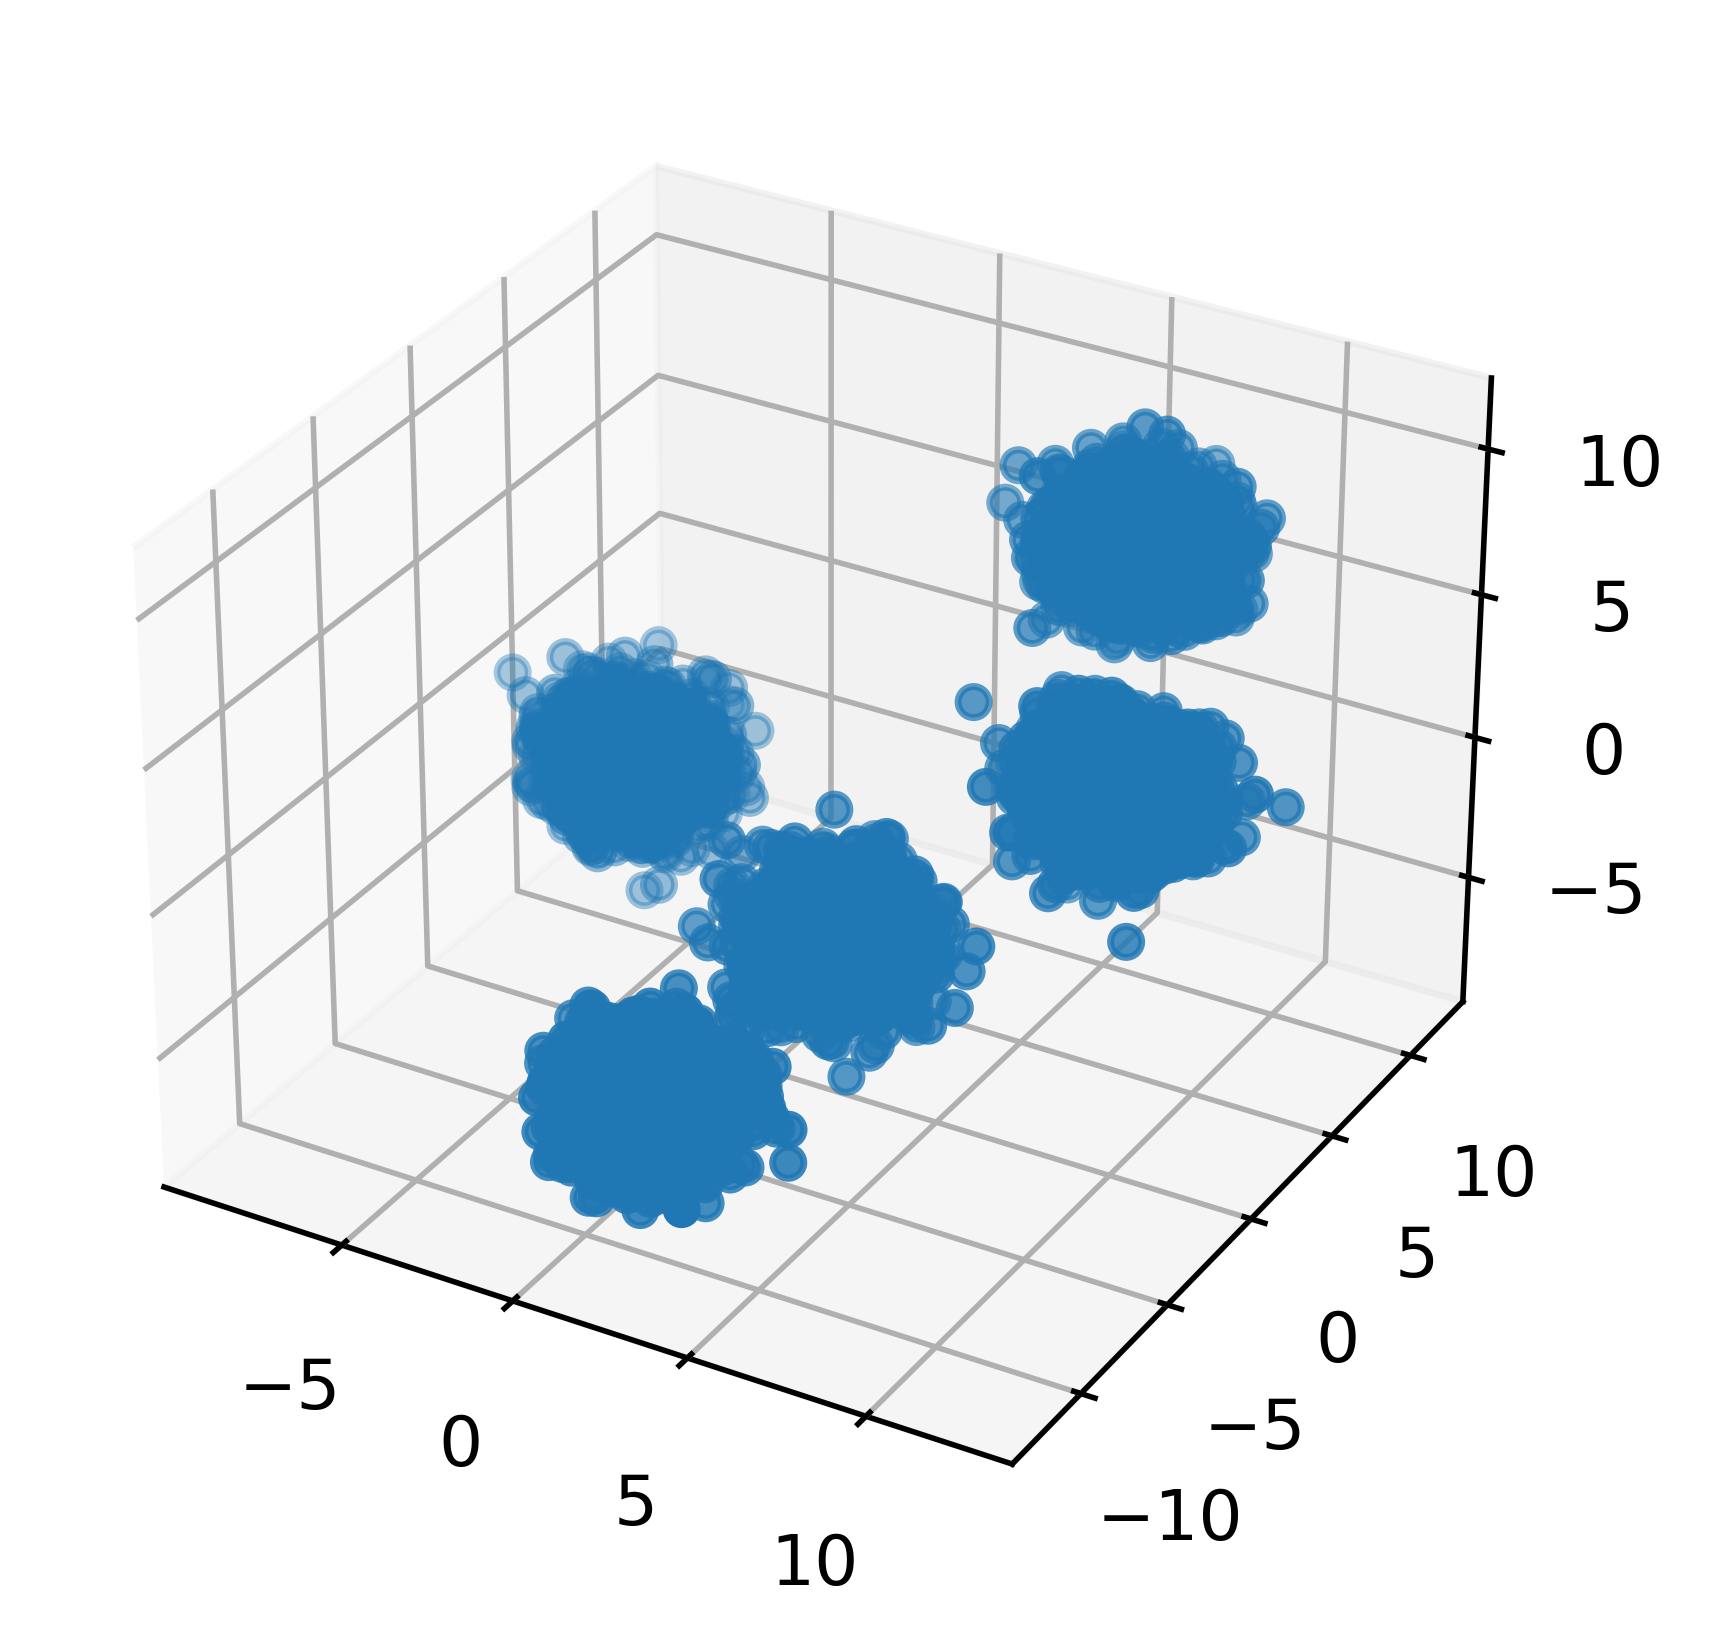

In [3]:
# visualizing the above dataframe
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
ax.scatter(df.x, df.y, df.z);

<b>Here we're creating a <font color='darkviolet'>Euclidean distance metric</font> which is required to <font color='darkviolet'>assign</font> an appropriate <font color='darkviolet'>cluster</font> for each of the <font color='darkviolet'>data points</font>

In [4]:
def dist(pt1,pt2):
    if type(pt1)!=type(np.array([1])) or type(pt2)!=type(np.array([1])):
        pt1,pt2=np.array(pt1),np.array(pt2)
    return np.sqrt(((pt1-pt2)**2).sum())

# <font color='darkviolet'>K-Means Clustering Algorithm</font>
Here we are writing the main algorithm to cluster the given datapoints

In [5]:
def kmeans(k,data,itr,thres):
    
    # choosing k rabdom datapoints to initialize the means
    means=data.sample(k).values
    count=0
    compare=[]
    
    # outer while loop to control the no of iterations using count
    while count<itr:
        count+=1
        
        # initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data.values:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist(mean,point)
                
                if d<mindist:
                    # capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # optimizing the centroids by taking the mean of all the points in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # checking for convergence of centroid for early stopping
        if len(compare)>1 and dist(compare[-1],compare[-2])<thres:
            print(f'The algorithm converged in {count} iterations')
            return means
    return means

In [6]:
mu=kmeans(5,df,1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')

The algorithm converged in 13 iterations

The centroids of k-clusters are [[6.897650200910503, 7.712072391474282, 7.273164365071164], [8.776167980126903, 2.6698617963063698, 1.9699799067881514], [-4.859205672409188, 1.748538086488138, -1.1621322279458381], [1.3326386609204797, -8.896645645772372, -4.923548138836605], [3.534785628155893, -2.789641145754376, -1.8695797179033928]]


<b>Here we're creating a function called <font color='green'>coloring</font> which <font color='green'>assigns unique integer values</font> for each <font color='green'>datapoint</font> based on the <font color='green'>cluster</font> it is belonging to. We're going to use <font color='darkgreen'>.apply()</font> method and finally use <font color='darkgreen'>scatterplot</font> to visualize the clusters.

In [7]:
def coloring(point1,point2,point3):
    mindist=float('inf')
    ans=None
    point=[point1,point2,point3]
    for i,pt in enumerate(mu):
        if dist(pt,point)<mindist:
            mindist=dist(pt,point)
            ans=i
    return ans

In [8]:
# derived column called color
df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z),axis=1)

In [9]:
mu=np.array(mu)

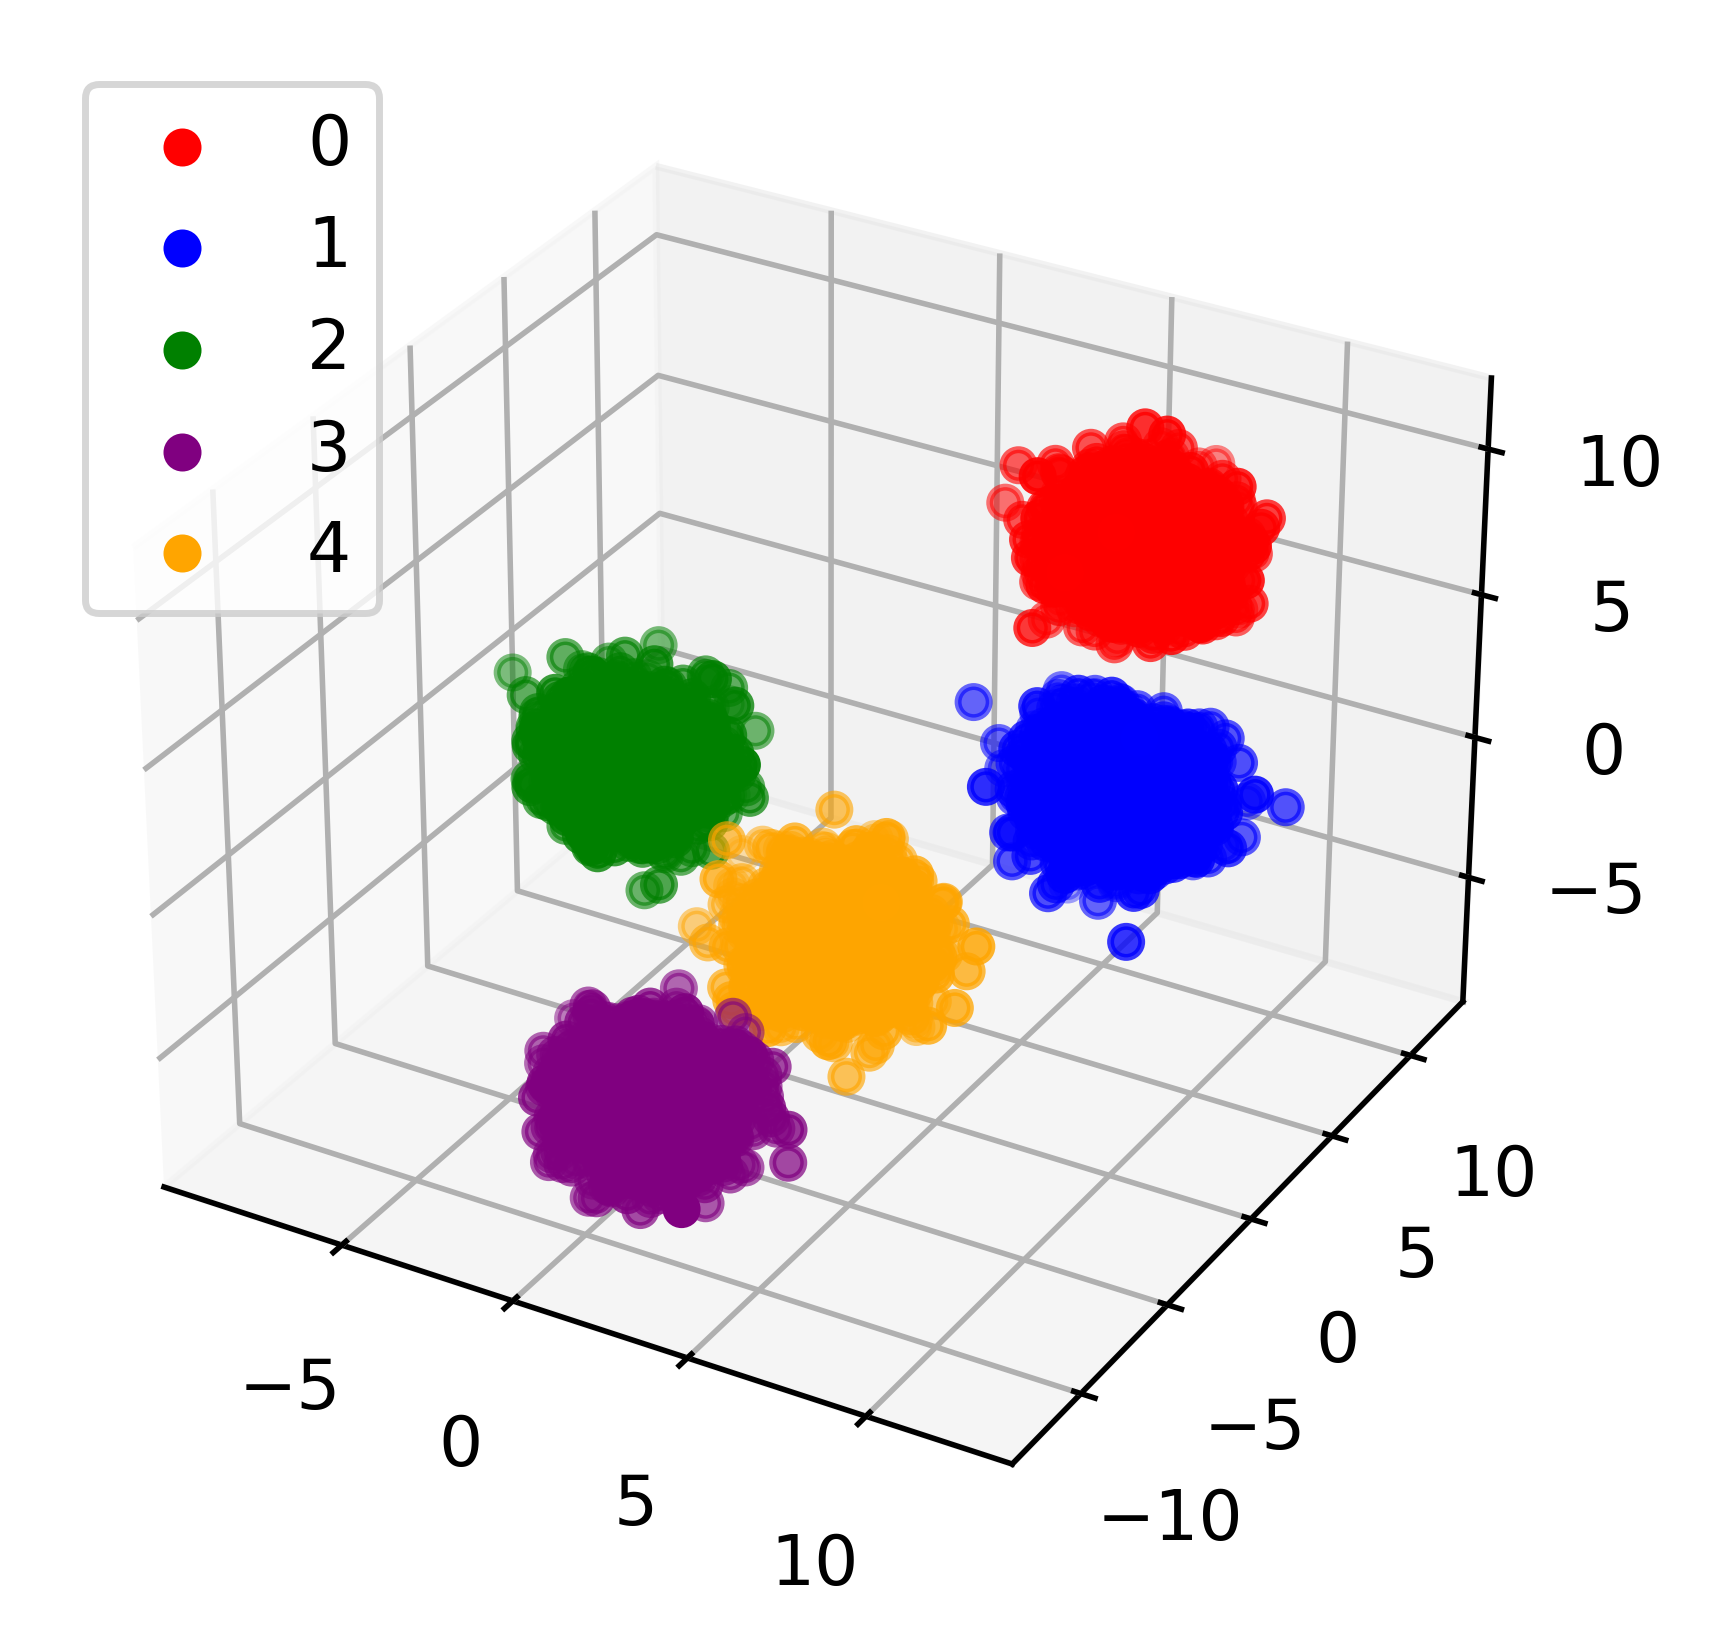

In [10]:
# visualizing the given dataset based on the clusters that we created using k-means clustering algorithm
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

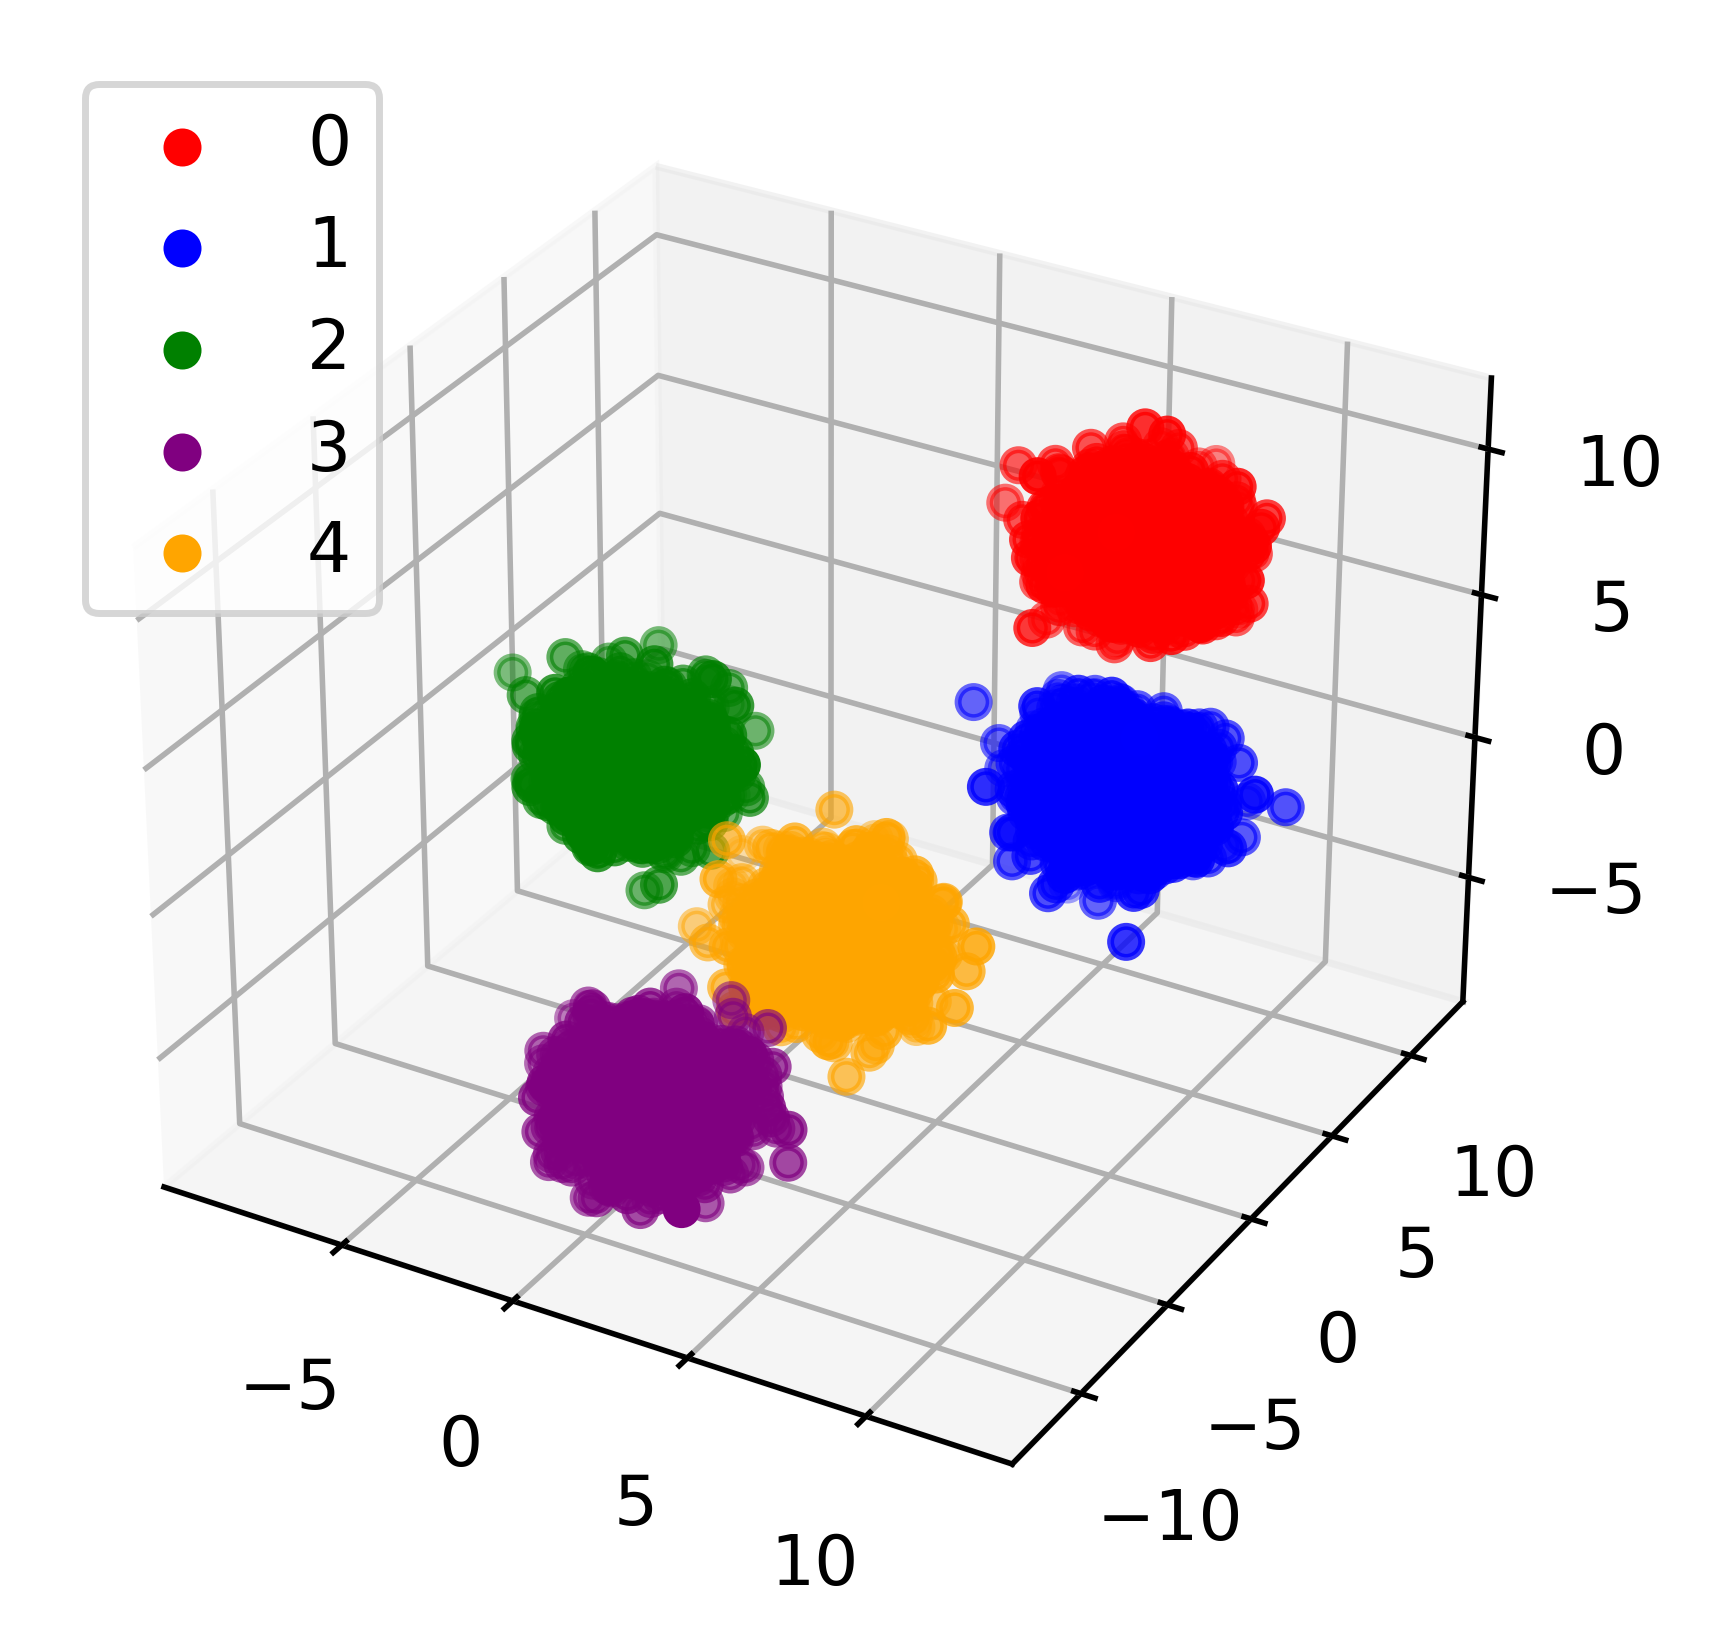

In [11]:
# visualizing the original dataset using the actual clustering as given by the make_blobs
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[data[1]==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

<b>We can see that the <font color='blue'>clusters</font> of points produced by our are <font color='blue'>k-means clustering algorithm</font> are almost identical with the actual <font color='blue'>clusters</font> made using the <font color='blue'>make_blobs</font> dataset in scikit-learn.</b>